In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

np.random.seed(42)

In [18]:

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KMeans():
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)
        
            
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            if self._is_converged(centroids_old, self.centroids):
                break
           

        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def get_centroids(self):
        return self.centroids




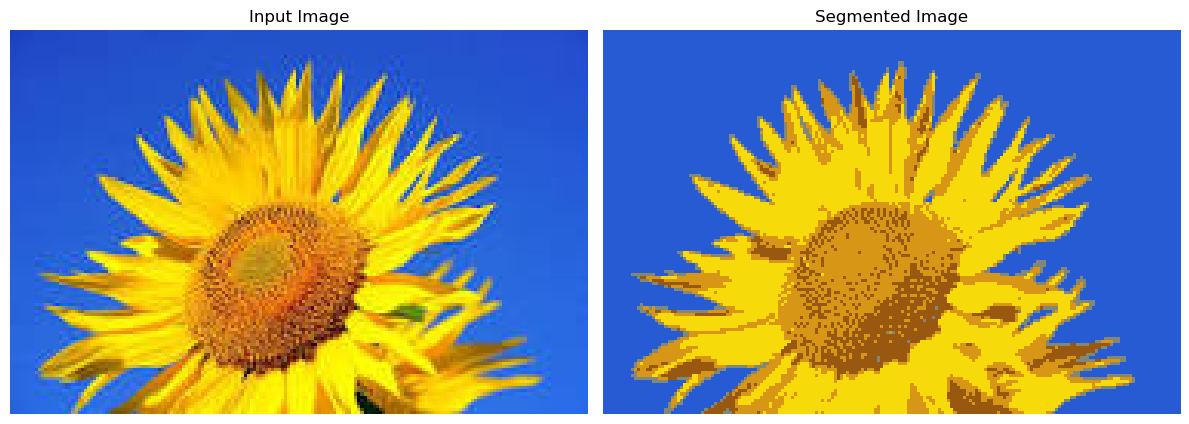

In [19]:
if __name__ == "__main__":
    from PIL import Image
    
    # Load input image
    input_image = Image.open("Sunflower.jpg")
    
    # Convert input image to numpy array
    input_image_data = np.array(input_image)
    
    # Initialize KMeans instance
    kmeans = KMeans(K=5, max_iters=100, plot_steps=True)
    
    # Perform image segmentation using KMeans
    segmented_image_labels = kmeans.predict(input_image_data.reshape(-1, 3))
    
    # Get cluster centroids
    centroids = kmeans.get_centroids()
    
    # Create segmented image using cluster labels and centroids
    segmented_image_data = np.array([centroids[int(label)] for label in segmented_image_labels])
    segmented_image_data = segmented_image_data.reshape(input_image_data.shape).astype(np.uint8)
    segmented_image = Image.fromarray(segmented_image_data)
    
    # Display the input and segmented images side by side
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(input_image)
    plt.title("Input Image")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title("Segmented Image")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()
